## Lab #4 - RLC Circuits

### PHYS 164

***

In this lab we will look at the behavior of an RLC circuit which consists of a resistor (R), inductor (L), and capacitor (C).

An inductor is a coil of wire that resists changes in current. As the current changes, the magnetic flux through the inductor also changes.  This change in flux introduces a potential opposite to the original one which resists the change.  For an inductor, the potential is given by:

$$ \Delta V = L \frac{dI}{dt}$$

where $L$ is the inductance, which depends on the properties of the inductor itself.

Since $I = dQ/dt$, we can write the potential difference as:

$$ \Delta V = L \frac{d^2 Q}{dt^2} $$

For a capacitor, the potential difference is given by $\Delta V = Q/C$, where $C$ is the capacitance.  And for a resistor, the potential difference is given by $\Delta V = IR = R dQ/dt$.

With all three in series, Kirchoff's voltage law says the total change in potential must be zero, so:

$$ L \frac{d^2 Q}{dt^2} + R \frac{dQ}{dt} + \frac{Q}{C} = 0 $$

This equation is analogous to a mass on a spring which is also subject to a damping force (proportional to velocity).  In that case, the net force can be written as:

$$ m \frac{d^2 x}{dt^2} + b \frac{dx}{dt} + kx = 0 $$

where $b$ is the damping constant and $k$ is the spring constant.  For our RLC circuit, the inductance $L$ is equivalent to mass, the resistor provides damping, and the 'spring constant' is $1/C$.

Similar to a traditional mass-spring system, we can find the natural frequency of oscillation.  Continuing our analogy, the frequency of oscillation should be:

$$ \omega_0 = \sqrt{\frac{1}{LC}} $$

Because of damping, the amplitude of oscillation will also decay over time.  We can use theory to predict what the half-life of this decay is, i.e. the time needed for the amplitude to reach half of its initial value.

For an RLC circuit, the half life is given by:

$$ t_{1/2} = \frac{2L}{R} \ln 2 $$

***

### Experimental Procedure

* Connect your circuit as shown below.  The 1 k$\Omega$ resistor has brown-black-red bands on your circuit board.  The inductor is the blue cylinder, and the 100 pF capacitor is the smallest of the three green components.  The oscilloscope should be configured to measure the potential difference across the capacitor.

![rlc_circuit](images/rlc_circuit.png)

* Adjust the oscilloscope (try 5 $\mu$s/div to start) and function generator (try f=1500 Hz) until you can clearly see the exponential decay of the signal.

* Use the cursors to measure $f_0$, the frequency of the decaying oscillations

* Use the cursors to measure the half-life of the decaying oscillations, finding the time for the voltage to drop to half of its initial value.  Note that you may need to adjust settings on the oscilloscope, and you can also adjust the output voltage of the function generator as well.

**Important note:** The oscilloscope has its own internal capacitance of 15 pF.  That makes the overall capacitance of the circuit 115 pF.

***

### Analysis

* Using the measured frequency, calculate $\omega_0 = 2\pi f_0$.  Compare your result with the expected value.  Find the uncertainty for both your value, and the expected one.

* Compare your measured half-life with the expected value.  Find the uncertainty for both your value, and the expected one.

***

### A note on uncertainties:

We have discussed uncertainties for plots, but not much regarding calculated values.  If you are multiplying (or dividing) two values, the *fractional* uncertainty in the product (or quotient) is given by the sum of the *fractional* uncertainty of each component. That is, if $z = xy$ **or** if $z=x/y$,

$$ \frac{\delta z}{z} = \frac{\delta x}{x} + \frac{\delta y}{y} $$

where $\delta z$ is the uncertainty in $z$, etc.

If we are raising a quantity to some power, the fractional uncertainty is multiplied by the absolute value of that power.  For example, if $y = x^n$,

$$ \frac{\delta y}{y} = |n| \frac{\delta x}{x} $$

These can be used in combination to find the overall uncertainty for quantities like $\omega_0$.

**Note that all components used in this lab have an uncertainty of 10%.**

***

### Week 2:

In last week's lab, you (hopefully) found the voltage in the RLC circuit would oscillate with a frequency of 80-85 kHz.  The driving frequency was around 1.5 kHz, which is much smaller.  In this week's lab, we will look at what happens when the circuit is driven with a frequency near the natural frequency of oscillation.  This phenomenon is known as resonance.

If our circuit is driven well below the resonant frequency, the source and the response (i.e. the capacitor voltage) will be oscillating in phase, with no offset.  If the circuit is driven well above resonance, the source and the response will be $180^{\circ}$ out of phase.  At the resonant frequency of $\omega_0$, the offset is exactly $\pi/2$ radians or $90^{\circ}$ between the two.  Note that the offset is negative, since the response will always lag the source.

A plot of $\omega$ vs. $\phi$ looks like the curve below:

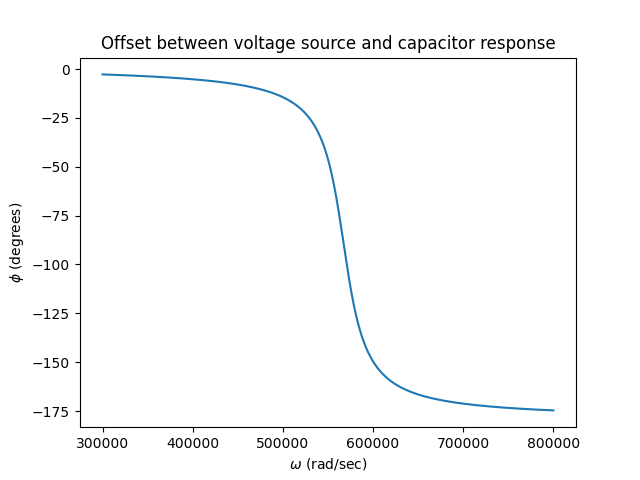

In [19]:
import numpy as np
import matplotlib.pyplot as plt
def phi(omega):
    return np.arctan2(1000,omega*0.027-1/(omega*115e-12))-np.pi
def q0(omega):
    return -np.sin(phi(omega))/(omega*1000)

omega = np.arange(3e5,8e5)
plt.plot(omega,phi(omega)*180/np.pi,'-')
plt.xlabel('$\omega$ (rad/sec)')
plt.ylabel('$\phi$ (degrees)')
plt.title('Offset between voltage source and capacitor response')
plt.show()

Similarly, at frequencies much below or above the resonant frequency, the amplitude of the source and response will be similar.  However near resonance, the amplitude of the response increases significantly.  When plotting the response voltage vs. $\omega$, there is a peak near $\omega_0$ as seen below:

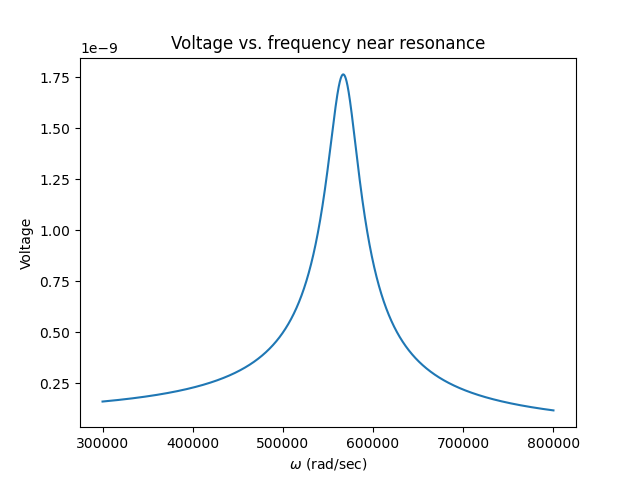

In [20]:
plt.plot(omega, q0(omega), '-')
plt.xlabel('$\omega$ (rad/sec)')
plt.ylabel('Voltage')
plt.title('Voltage vs. frequency near resonance')
plt.show()

The width of this curve is often called the `Q-factor` and describes the "quality" of resonance.  Note this should not be confused with $Q$ for charge.

***

#### Data Collection

* Connect the RLC circuit in an identical fashion to last week.  Connect the oscilloscope so that Channel 1 measures the input voltage from the function generator, and Channel 2 measures the voltage across the capacitor.

* On the function generator, select the sine wave, choose the 100 kHz frequency range, and turn the frequency knob fully counter-clockwise.

* Set the channel 2 scale on the oscilloscope to 5 V per division.

* Gradually increase the frequency on the function generator.  You will see the amplitude of channel 2 rise and then begin to decrease.  If the signal for channel 2 exceeds the limits of the screen, decrease the amplitude of the signal coming from the function generator.

* Carefully adjust the frequency until the amplitude for channel 2 is at its maximum value.  Record this value as the **resonance frequency** $f_0$, along with its uncertainty.

* Record the amplitude of both the capacitor voltage and the function generator voltage at this frequency.

* Record the **smaller** time interval between the peaks of the two curves using the vertical cursors.

* Repeat your voltage and time measurements from 60 kHz up to 110 kHz, in steps of 5 kHz.

***

#### Analysis:

* The angular offset between the two curves (in degrees) is given by $\phi = (t/T) \times 360^{\circ}$, where $t$ is the offset between the curves and $T = 1/f$ is the period of the curves.

* Calculate $\omega$ and $\phi$ for each frequency that you measured.

* Make a plot of $V_{\rm C}$ vs. $\omega$, where $V_{\rm C}$ is the voltage across the capacitor.

* Make a plot of $\phi$ vs. $\omega$

* From your plot of $V_{\rm C}$ vs. $\omega$, estimate the peak of this curve.  How does that compare with your measurement of $\omega_0 = 1/\sqrt{LC}$?

* From the graph of $\phi$ vs. $\omega$, find the value of $\omega$ corresponding to $\phi = 90^{\circ}$.  How does this compare to $\omega_0 = 1/\sqrt{LC}$?

***

#### To be included in your writeup:

* A header with the usual information

* Your measurements for $\omega_0$ and $t_{1/2}$ from the first week, along with their uncertainties (including descriptions of how you got the uncertainty)

* Calculation of the theoretical values for $\omega_0$ and $t_{1/2$, along with their uncertainties

* Discussion of whether your measurements agree with the theoretical values, within the uncertainties

* Data for measurements of $V_{\rm C}$ and $\phi$

* Plots of $\omega$ vs. $V_{\rm C}$ and $\omega$ vs. $\phi$

* Discussion of whether your plots resemble those shown above

